# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Stephen Miller - https://github.com/scmiller77

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [40]:
import requests
import pickle

#set URL and filename to push HTML info
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"
html_file = "website_html_content.pkl"

#access data
response = requests.get(url)

html_info = response.text

#dump data into .pkl file
with open(html_file, "wb") as file:
    pickle.dump(html_info, file)
    

2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [41]:
from bs4 import BeautifulSoup

# Load the HTML content from the .pkl file
with open(html_file, 'rb') as file:
    html_info = pickle.load(file)

# Parse the HTML info using BeautifulSoup
soup = BeautifulSoup(html_info, 'html.parser')

article_content = soup.find("div", class_="entry-content")

# Extract and print the data cleanly
text = article_content.get_text(strip = True, separator = "\n")
print(text)


When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!
Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside of a very specific spot quite some distance away. Thankfully for our eyes, laser headlights don’t work in this way

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [42]:
from collections import Counter
import spacy

nlp = spacy.load("en_core_web_sm")

# Process the text with spaCy
doc = nlp(text)

# Filter tokens: exclude punctuation, stopwords, and whitespace
tokens = [
    token.text.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Count token frequencies
token_freq = Counter(tokens)

# Get the 5 most common tokens
most_common = token_freq.most_common(5)

# Print the results
print("Most Frequent Tokens:")
for token, freq in most_common:
    print(f"Token: {token}, Frequency: {freq}")

Most Frequent Tokens:
Token: laser, Frequency: 30
Token: headlights, Frequency: 17
Token: technology, Frequency: 10
Token: headlight, Frequency: 10
Token: led, Frequency: 10


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [43]:
# Filter tokens: exclude punctuation, stopwords, and whitespace
lemmas = [
    token.lemma_.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Count the lemma frequencies
lemma_freq = Counter(lemmas)

# Get the 5 most common lemmas
most_common = lemma_freq.most_common(5)

# Print the results
print("Most Frequent Lemmas:")
for lemma, freq in most_common:
    print(f"Lemma: {lemma}, Frequency: {freq}")
    

Most Frequent Lemmas:
Lemma: laser, Frequency: 35
Lemma: headlight, Frequency: 26
Lemma: beam, Frequency: 12
Lemma: technology, Frequency: 10
Lemma: led, Frequency: 10


5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [44]:
def score_sentence_by_token(sentence, interesting_tokens):
    #scored a sentence by the presense of interesting tokens
    
    #Ignores punctuation
    tokens = [token.text.lower() for token in sentence if not token.is_punct]
    if not tokens:
        return 0.0
    count = sum(1 for token in tokens if token in interesting_tokens)
    return count / len(tokens)

def score_sentence_by_lemma(sentence, interesting_lemmas):
    
    #Scores a sentence by the presence of interesting lemmas.

    #Ignores punctuation
    lemmas = [token.lemma_.lower() for token in sentence if not token.is_punct]
    if not lemmas:
        return 0.0
    count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    return count / len(lemmas)


6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

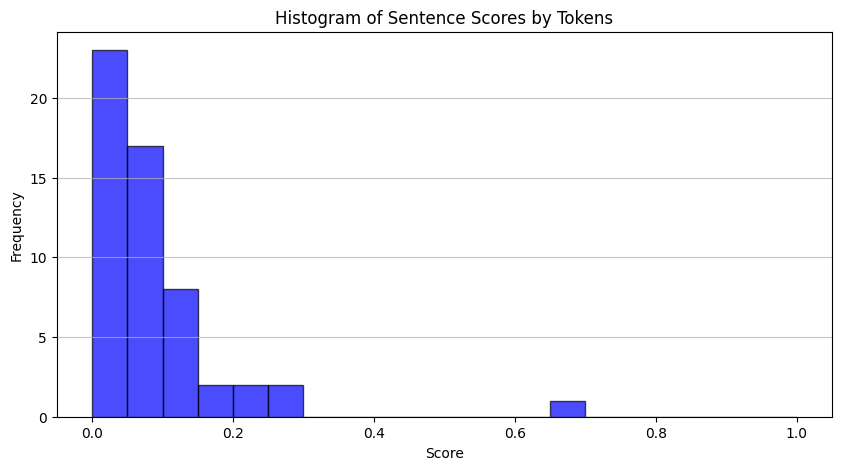

In [45]:
import matplotlib.pyplot as plt

# Determine the most frequent tokens and lemmas
tokens = [
    token.text.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]
token_freq = Counter(tokens)
interesting_tokens = [token for token, _ in token_freq.most_common(5)]

scores_by_token = [score_sentence_by_token(sentence, interesting_tokens) for sentence in doc.sents]

# Plot histogram for token-based scores
plt.figure(figsize=(10, 5))
plt.hist(scores_by_token, bins=20, range=(0.0, 1.0), color='blue', alpha=0.7, edgecolor='black')
plt.title("Histogram of Sentence Scores by Tokens")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.show()

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

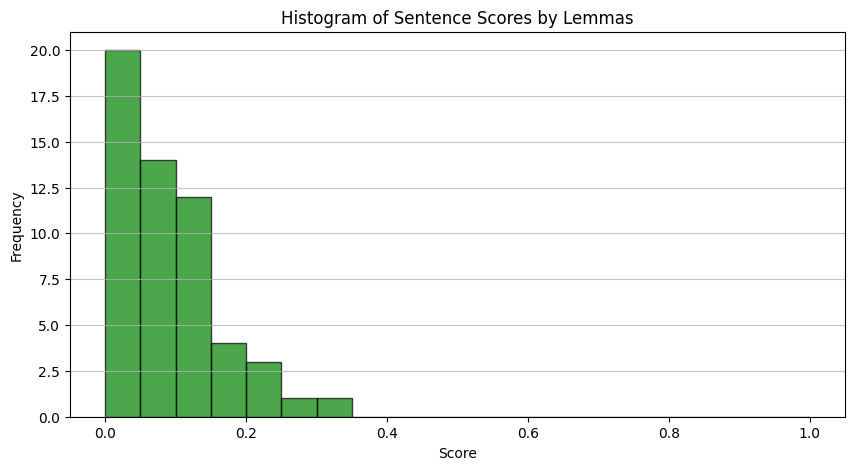

In [46]:

lemmas = [
    token.lemma_.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]
lemma_freq = Counter(lemmas)
interesting_lemmas = [lemma for lemma, _ in lemma_freq.most_common(5)]
    

scores_by_lemma = [score_sentence_by_lemma(sentence, interesting_lemmas) for sentence in doc.sents]

# Plot histogram for lemma-based scores
plt.figure(figsize=(10, 5))
plt.hist(scores_by_lemma, bins=20, range=(0.0, 1.0), color='green', alpha=0.7, edgecolor='black')
plt.title("Histogram of Sentence Scores by Lemmas")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.show()

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

The token/lexem "led" would be omitted. In order to implement this, we can use spacy to exclude non-nouns, by utilizing "NOUN" and "PROPN" to only pull in nouns and proper nouns into our lists.